# Rejection Sampling

**Import required libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

**Define a function Normal()**

In [2]:
def Normal(x, mu, sigma):
    return np.exp(-((x-mu)**2)/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)

**Define p'(x) using the above Normal function**

In [3]:
def p_(x):
    return Normal(x, 20, 10) + Normal(x, 50, 5) + Normal(x, 80, 20)

**Define q(x)**

In [4]:
def q(x):
    return Normal(x, 50, 30)

**Setting the range for x**

In [5]:
x_range = np.arange(-50, 120, 0.1)

**Finding M using p' and q**

In [6]:
M = np.max(p_(x_range)/q(x_range))

**Rejection sampling algorithm**

In [7]:
n_iters = 0
n_samples = 0
samples = []
while n_samples <= 10000:
    n_iters += 1
    z = np.random.normal(50, 30)
    u = np.random.uniform(0, M*q(z))
    if u <= p_(z):
        samples.append(z)
        n_samples += 1
        if n_samples % 100 == 0:
            print("=", end='')

**Plot the samples**

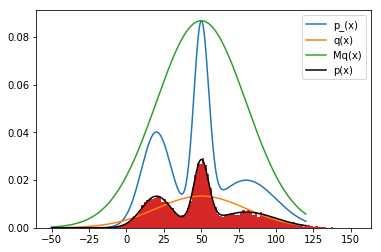

In [8]:
plt.plot(x_range, p_(x_range))
plt.plot(x_range, q(x_range))
plt.plot(x_range, M*q(x_range))
plt.plot(x_range, 0.33*p_(x_range), color='black')
plt.hist(samples, 100, density=True)
plt.legend(['p_(x)', 'q(x)', 'Mq(x)', 'p(x)'])
plt.savefig('rejection_samples.png')
plt.show()

**Acceptance rate**

In [9]:
print("Acceptance rate =", 100*n_samples/n_iters, "%")

Acceptance rate = 45.52530954115076 %
